In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def gen_mask(length, p, prob_func='constant', symmetric=True):
    """
    Call of prob_func gives 1 or 0 with certain probability.
    """
    mask_mat = np.zeros((length, length))
    prob = 0
    if prob_func == 'pn':
        prob = p
    if prob_func == 'log':
        prob = p * np.log(length) / length
    if prob_func == 'p':
        prob = p / length
    for i in range(length):
        for j in range(length):
            if i >= j:
                val = 0
                r = np.random.uniform()
                if r <= prob:
                    val = 1
                mask_mat[i, j] = val
                if symmetric:
                    mask_mat[j, i] = val
                else:
                    mask_mat[j, i] = 1-val
    return mask_mat


def eigval_helper(Mat, u=None):
    eigvals, eigvecs = np.linalg.eig(Mat)
    eigvals = np.abs(eigvals)
    idx = np.argmax(eigvals)
    max_eigvec = eigvecs[:, idx]
    # print(max_eigvec)
    # print(u.reshape(-1))
    if u is None:
        return sorted(eigvals)
    inner_prod = np.inner(max_eigvec, u.reshape(-1))
    return sorted(eigvals), inner_prod


def get_spectrum(n, theta, mask1, mask2, u_func=None):
    if u_func is None:
        u = np.random.rand(n)
        u = u / np.linalg.norm(u)
        u = u[None, :]
    else:
        u = u_func(n)
    A = theta * u * u.transpose()
    Atilda = A * mask1
    Abar = Atilda * mask2
    eigvals1, ip1 = eigval_helper(Atilda, u)
    eigvals2, ip2 = eigval_helper(Abar, u)
    return eigvals1, ip1, eigvals2, ip2

## Vary d, check inner product

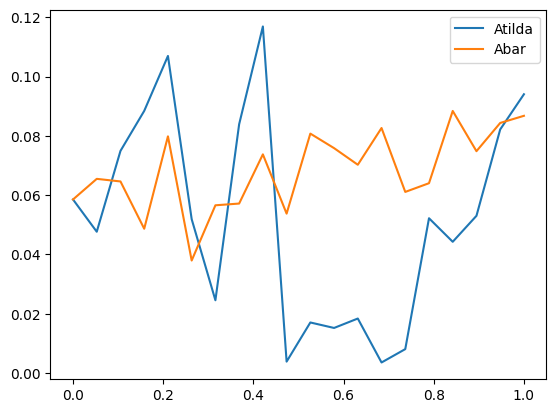

In [2]:
p_list = np.linspace(0, 1, 20)
# p_list = [0, 1]
iters = 5

n = 200
theta = 10

prob_func1 = 'p'
prob_func2 = 'pn'

ip1_list = []
ip2_list = []
for p_idx in range(len(p_list)):
    p = p_list[p_idx]
    # print(p)
    ip1s, ip2s = [], []
    for i in range(iters):
        mask1 = gen_mask(n, p, prob_func1, True)
        mask2 = gen_mask(n, 0.5, prob_func2, False)
        eigvals1, ip1, eigvals2, ip2 = get_spectrum(n, theta, mask1, mask2)
        ip1s.append(ip1)
        ip2s.append(ip2)
    ip1_list.append(np.abs(np.mean(ip1s)))
    ip2_list.append(np.abs(np.mean(ip2s)))

plt.plot(p_list, ip1_list, label='Atilda')
plt.plot(p_list, ip2_list, label='Abar')
plt.legend()
plt.show()

## Different u

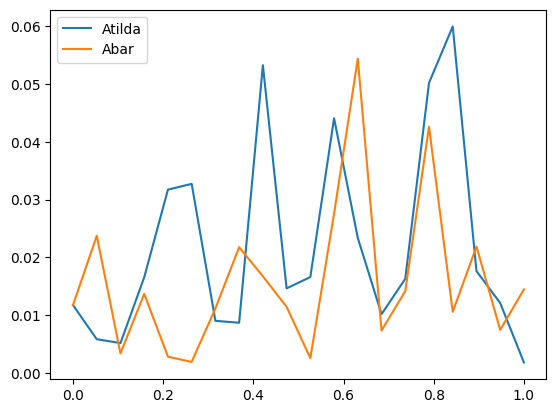

In [3]:
def u_func1(length):
    u = np.random.randn(length)
    u = u / np.linalg.norm(u)
    u = u[None, :]
    return u


p_list = np.linspace(0, 1, 20)
# p_list = [0, 1]
iters = 20

n = 200
theta = 10

prob_func1 = 'p'
prob_func2 = 'pn'

ip1_list = []
ip2_list = []
for p_idx in range(len(p_list)):
    p = p_list[p_idx]
    # print(p)
    ip1s, ip2s = [], []
    for i in range(iters):
        mask1 = gen_mask(n, p, prob_func1, True)
        mask2 = gen_mask(n, 0.5, prob_func2, False)
        eigvals1, ip1, eigvals2, ip2 = get_spectrum(n, theta, mask1, mask2, u_func=u_func1)
        ip1s.append(ip1)
        ip2s.append(ip2)
    ip1_list.append(np.abs(np.mean(ip1s)))
    ip2_list.append(np.abs(np.mean(ip2s)))

plt.plot(p_list, ip1_list, label='Atilda')
plt.plot(p_list, ip2_list, label='Abar')
plt.legend()
plt.show()